# ANN with tensorflow to predict housing prices

##### https://www.kaggle.com/code/saurav9786/ann-with-tensorflow-2-0-to-predict-housing-prices/notebook

### Check Tensorflow installed on this machine

In [1]:
# Before start doing tensorflow, need to install using following commands, if you installed already, then ignore
# ! pip install tensorflow
# Above line will install tensorflow into our directory

## Import Required Libiraries

In [2]:
# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# impoer numpy, pands and matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Checking the tensorflow libraries
print(tf.__version__)

2.18.0


## Load Dataset

In [4]:
# load dataset by using pands
data = pd.read_csv("./housing.csv")

# check no.of rows and column
print("Shape of the Data\n", data.shape)

# display head values
print("\nTop 3 rows values\n", data.head(3))

# Checking for the null values
print("\nis there any columns have null values\n", data.isna().any())

# Count of null values in each column
print("\nCount the number of columns having null values\n", data.isnull().sum())

# total_bedrooms  column have some of null values in row, removing that row
print("\nDrop Null Values Row and update same\n")
data.dropna(inplace=True)  # this will drop null values rows and update same

# check again is there any rows having null values
print(
    "\nAfter drop null values row, is there any columns have null values\n",
    data.isnull().sum(),
)

# check no.of rows and column
print("\nShape of the Data\n", data.shape)

Shape of the Data
 (20640, 10)

Top 3 rows values
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  

is there any columns have null values
 longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool


#### Encodeing String column into numeric values to imporve accuracy

In [5]:
# in data column which having string have values
# Select columns with string values
string_columns = data.select_dtypes(include=["object"]).columns

# Print the column names with string values
print("Columns with string values:", string_columns)

print(string_columns)

# Get the counts of unique values in the 'target' column
value_counts = data[string_columns].value_counts()

# Print the value counts
print("\nocean_proximity : Counts : \n", value_counts)

# using label encoder to encode values 0-4, since only 5 repeted values are theres
# import labelEncoder from sklearn > preprocessing
from sklearn.preprocessing import LabelEncoder

# initialize label encode
label_encoder = LabelEncoder()

# convert targeted column
# Apply Label Encoding to each string column
for col in string_columns:
    data[col] = label_encoder.fit_transform(data[col])


# after encoding ,display values
print(data.head())


#  now once again check
# Get the counts of unique values in the 'target' column
value_counts = data[string_columns].value_counts()

# Print the value counts
print("\nocean_proximity : Counts : \n", value_counts)

Columns with string values: Index(['ocean_proximity'], dtype='object')
Index(['ocean_proximity'], dtype='object')

ocean_proximity : Counts : 
 ocean_proximity
<1H OCEAN          9034
INLAND             6496
NEAR OCEAN         2628
NEAR BAY           2270
ISLAND                5
Name: count, dtype: int64
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0         322         126         8.3252              452600                3  
1        2401        1138         8.3014              358500                3  
2  

#### Reorder the the data set colomns

In [6]:
# check columns name
cols = data.columns.tolist()
print("\nColumns Names are: \n", cols)

# Move 'target' column to the last position
# our Target column is "median_house_value"
cols.append(
    cols.pop(cols.index("median_house_value"))
)  # Move 'target' to the last position
data = data[cols]  # Reorder DataFrame

# Print the modified DataFrame
print(data)


Columns Names are: 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     

#### Seperate x and y data for feature scaling

In [7]:
# for x , all rows and all coulums expect last columns
x = data.iloc[:, :-1].values
# for x , all rows and last columns only
y = data.iloc[:, -1].values

#  dispaly values
print("\nx valus\n", x)
print("\ny valus\n", y)


x valus
 [[-1.2223e+02  3.7880e+01  4.1000e+01 ...  1.2600e+02  8.3252e+00
   3.0000e+00]
 [-1.2222e+02  3.7860e+01  2.1000e+01 ...  1.1380e+03  8.3014e+00
   3.0000e+00]
 [-1.2224e+02  3.7850e+01  5.2000e+01 ...  1.7700e+02  7.2574e+00
   3.0000e+00]
 ...
 [-1.2122e+02  3.9430e+01  1.7000e+01 ...  4.3300e+02  1.7000e+00
   1.0000e+00]
 [-1.2132e+02  3.9430e+01  1.8000e+01 ...  3.4900e+02  1.8672e+00
   1.0000e+00]
 [-1.2124e+02  3.9370e+01  1.6000e+01 ...  5.3000e+02  2.3886e+00
   1.0000e+00]]

y valus
 [452600 358500 352100 ...  92300  84700  89400]


## Spliting into Training and Test Data set


In [8]:
# import train_test_split model selection from sklearn
from sklearn.model_selection import train_test_split

# Spliting into models as 80% of Training and 20% of Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# display length of values
print("size of X training models : ", len(x_train))
print("size of X test models : ", len(x_test))
print("size of Y training models : ", len(y_train))
print("size of Y test models : ", len(y_test))

# Check the number of dimensions
x_train_dim = x_train.ndim
print("Number of dimensions for x_train:", x_train_dim)

x_test_dim = x_train.ndim
print("Number of dimensions for x_test:", x_test_dim)

size of X training models :  16346
size of X test models :  4087
size of Y training models :  16346
size of Y test models :  4087
Number of dimensions for x_train: 2
Number of dimensions for x_test: 2


## Feature Scaling

In [9]:
# imprt standard scaller from sklearn preprocessing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# didplay values
print("After Scaling x_train : ", x_train[0])
print("After Scaling x_test : ", x_test[0])

After Scaling x_train :  [ 1.34433224 -1.36066295 -1.24306229  0.289854   -0.11174572  0.00483636
  0.00862081  0.99880176 -0.82243534]
After Scaling x_test :  [ 1.23949381 -1.37002754  0.66140662 -0.2109422  -0.28532789 -0.10925688
 -0.32616418 -0.52142955  1.99134271]


In [10]:
# i = 1
# #  Print dimention of X_train in console
# print("before flatened x_train shape (2D)", x_train.shape) # (16346, 9)
# print("before flatened x_train shape (2D)", x_test.shape) # (16346, 9)

# # by reshaping  x_train as 2D to 1D array
# x_train_flatened = x_train.reshape(len(x_train), x.shape[1] )
# x_test_flatened = x_test.reshape(len(x_test), x.shape[1] )

# # Display value in console
# print()
# print("x_train_flatened shape (1D) : ", x_train_flatened.shape)
# print("x_test_flatened shape (1D) : ",x_test_flatened.shape)

# # Display 1st values
# print(f"\nx_train_flatened[{i}] as (1D) : \n", x_train_flatened[i])
# print(f"\nx_test_flatened[{i}] as (1D) : \n", x_test_flatened[i])

In [11]:
print("x_train Dimentions", x_train.ndim)
print("x_test Dimentions", x_test.ndim)

# print("x_train_flatened", x_train_flatened.ndim)
# print("x_test_flatened", x_test_flatened.ndim)

print("y_train", y_train.ndim)
print("y_train", type(y_train))


print("y_test", y_test.ndim)
print("y_test", type(y_test))

x_train Dimentions 2
x_test Dimentions 2
y_train 1
y_train <class 'numpy.ndarray'>
y_test 1
y_test <class 'numpy.ndarray'>


In [12]:
x.shape

(20433, 9)

## Build Model - ANN

#### Build Neural Network model using tensorflow keras

In [13]:
# Step 1: Create a Sequential model, (Stack of layer in neural n/w - since it's stach, every layer is 1 element )
model = keras.Sequential([
    # Step 2: Add hidden Layer 1 with the output layer a n neurons, input shape is 784 (28*28) and activation function
    keras.layers.Dense(
        x.shape[1],
        input_dim = x.shape[1], # Input layers x.shape[1]
        activation = 'relu' # activation type
    ), 

    #  add hidden layer
    keras.layers.Dense(512, activation= 'relu'),
    keras.layers.Dense(512, activation= 'relu'),
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(64, activation= 'relu'),



    # Step 3: Add the output layer with 10 neurons (one for each digit), and activation function
    keras.layers.Dense(
        1, # Output layers for last hidden layer o/p (Note: for last layer no need for input layer size)
        activation = 'relu' # activation type
    )
    
    

])


C:\Users\Mohan Govindasamy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Complile that neural n/w

In [14]:
# Complile that neural n/w
model.compile(optimizer="adam", loss="mse", metrics=["mse", "mae"])
# model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae", "accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,411 (1.68 MB)

 Trainable params: 440,411 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

#### Fit into the model using Train Data Set

In [15]:
# fit into model (epochs=5 means  it will ittrate 5 times)
model.fit(x_train, y_train, batch_size=16, epochs=5, verbose=1)

Epoch 1/5
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 19496769536.0000 - mae: 99533.6719 - mse: 19496769536.0000
Epoch 2/5
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 4472931328.0000 - mae: 47533.6367 - mse: 4472931328.0000
Epoch 3/5
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - loss: 4315484672.0000 - mae: 46120.7422 - mse: 4315484672.0000
Epoch 4/5
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4243030784.0000 - mae: 45947.7812 - mse: 4243030784.0000
Epoch 5/5
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4033295360.0000 - mae: 44615.0859 - mse: 4033295360.0000


In [16]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential()

# # Input Layer
# model.add(Dense(x.shape[1], activation="relu", input_dim=x.shape[1]))

# # Hidden Layer
# model.add(Dense(512, kernel_initializer="normal", activation="relu"))
# model.add(Dense(512, kernel_initializer="normal", activation="relu"))
# model.add(Dense(256, kernel_initializer="normal", activation="relu"))
# model.add(Dense(128, kernel_initializer="normal", activation="relu"))
# model.add(Dense(64, kernel_initializer="normal", activation="relu"))
# model.add(Dense(32, kernel_initializer="normal", activation="relu"))
# # Output Layer
# model.add(Dense(1, kernel_initializer="normal", activation="relu"))


# # Compile the network

# model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae", 'accuracy' ])
# model.summary()


# # model.fit(x_train, y_train, batch_size=10, epochs=5, verbose=1)


### Evaluate model using Test Data set   

In [17]:
loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4004461056.0000 - mae: 44020.8711 - mse: 4004461056.0000
Test Loss: [3909441536.0, 3909441536.0, 43719.93359375]


## Sample Predection

### Predict test samples

In [18]:
# predict test samples with our model
y_pred = model.predict(x_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [19]:
# Convert all elements to integers
y_pred = y_pred.astype(int)

### Display the i th values

In [20]:
# change I values as wish it will be possition of array alone not actual values
i = 1,

# this will print 10 values in 1D array, because we give output dense layer as 10
print(f"Displaying y_pred[{i}] in console 1D array of 10 values (Dense o/p layes = 1)")
print(y_pred[i])

# in 1D array / y_pred[i], maximum values (consider predected -> o/p will be high)
print(f"\nIn the above o/p, Maximum values for y_pred[{i}] is:")
np.argmax(y_pred[i])
print()
print(y_test[i])

Displaying y_pred[(1,)] in console 1D array of 10 values (Dense o/p layes = 1)
[170137]

In the above o/p, Maximum values for y_pred[(1,)] is:

153000


## Visuals values in to console

In [21]:
print( 'shape of y_pred', y_pred.shape)
print( 'shape of y_test', y_test.shape)

shape of y_pred (4087, 1)
shape of y_test (4087,)


In [22]:
# First convert y_pred values to same as y_test with correct predection values
y_pred_label = y_pred.reshape(-1)

print( 'after Reshape: \nshape of y_pred', y_pred_label.shape)
print( 'shape of y_test', y_test.shape)

after Reshape: 
shape of y_pred (4087,)
shape of y_test (4087,)


In [23]:
# now print pred values
print("First 5 prect values is:\n", y_pred_label[:5])
# now print actual values
print("First 5 actual values is:\n", y_test[:5])

First 5 prect values is:
 [140008 170137 114476 374026 338243]
First 5 actual values is:
 [ 98900 153000  91300 345200 344100]



Confusion Matrix is:
 [[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


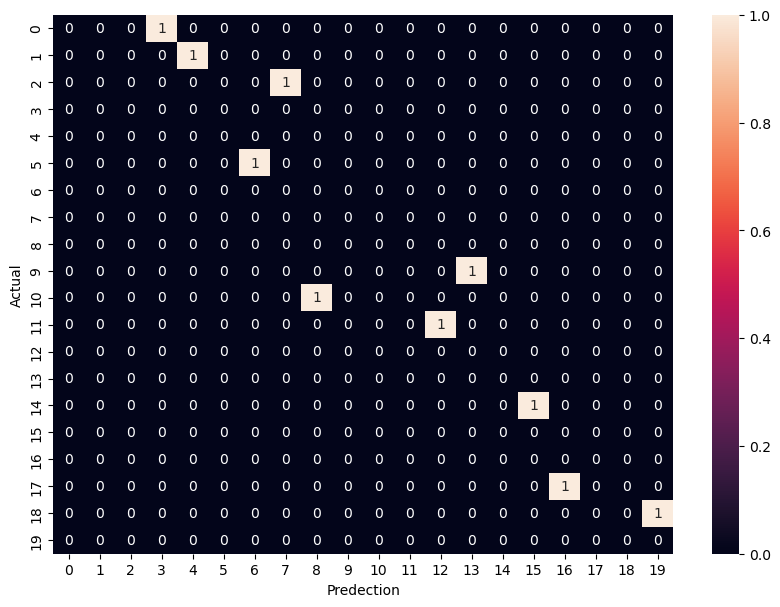

In [30]:
# Confution matrix values
from sklearn.metrics import confusion_matrix, accuracy_score

# if you face error OOM "ResourceExhaustedError"
# "It seems like you are encountering an "Out of Memory (OOM)" error. This typically happens when the operation is trying to allocate more memory than what is available on your CPU."

y_test_sample = y_test[:10]  # Adjust the size as needed
y_pred_sample = y_pred_label[:10]

# now check with confusion matrics with y_test & y_pred_label
# confusion_metrics = tf.math.confusion_matrix(labels=y_test_sample, predictions=y_pred_sample)
confusion_metrics = confusion_matrix(y_test_sample, y_pred_sample)
print("\nConfusion Matrix is:\n", confusion_metrics)


# Display in visuvalisation
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_metrics, annot=True, fmt= 'd')
plt.xlabel("Predection")
plt.ylabel("Actual")
plt.show()


In [ ]:
y_pred.shape


(4087, 1)

In [ ]:
y_test.shape

(4087,)

In [ ]:
y_pred_label = y_pred.reshape(-1)

In [ ]:
y_pred_label.shape

(4087,)

In [28]:
type(y_pred)
type(y_test)

numpy.ndarray

In [30]:
y_pred

array([[132442.36],
       [144885.77],
       [109477.24],
       ...,
       [155449.3 ],
       [212718.45],
       [232182.8 ]], dtype=float32)